<a href="https://colab.research.google.com/github/AromaDsouza/BigMart_Sales_Prediction/blob/main/BigMart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##Importing the necessary libraries




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score



##Loading the data

In [2]:
train_data = pd.read_csv('https://raw.githubusercontent.com/AromaDsouza/BigMart_Sales_Prediction/main/Bigmart_Train.csv')
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data = pd.read_csv('https://raw.githubusercontent.com/AromaDsouza/BigMart_Sales_Prediction/main/Bigmart_Test.csv')
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


##Statistical Analysis

In [6]:
train_data.shape

(8523, 12)

In [7]:
test_data.shape


(5681, 11)

In [8]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
train_data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
test_data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [12]:
train_data.isnull().sum()


,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [13]:
test_data.isnull().sum()


,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


#Basic EDA

Calculated bin widths:
Item_Weight: 0.841985959228946
Item_Visibility: 0.00661838928486656
Item_MRP: 8.989934845026276
Item_Outlet_Sales: 221.96955255095966


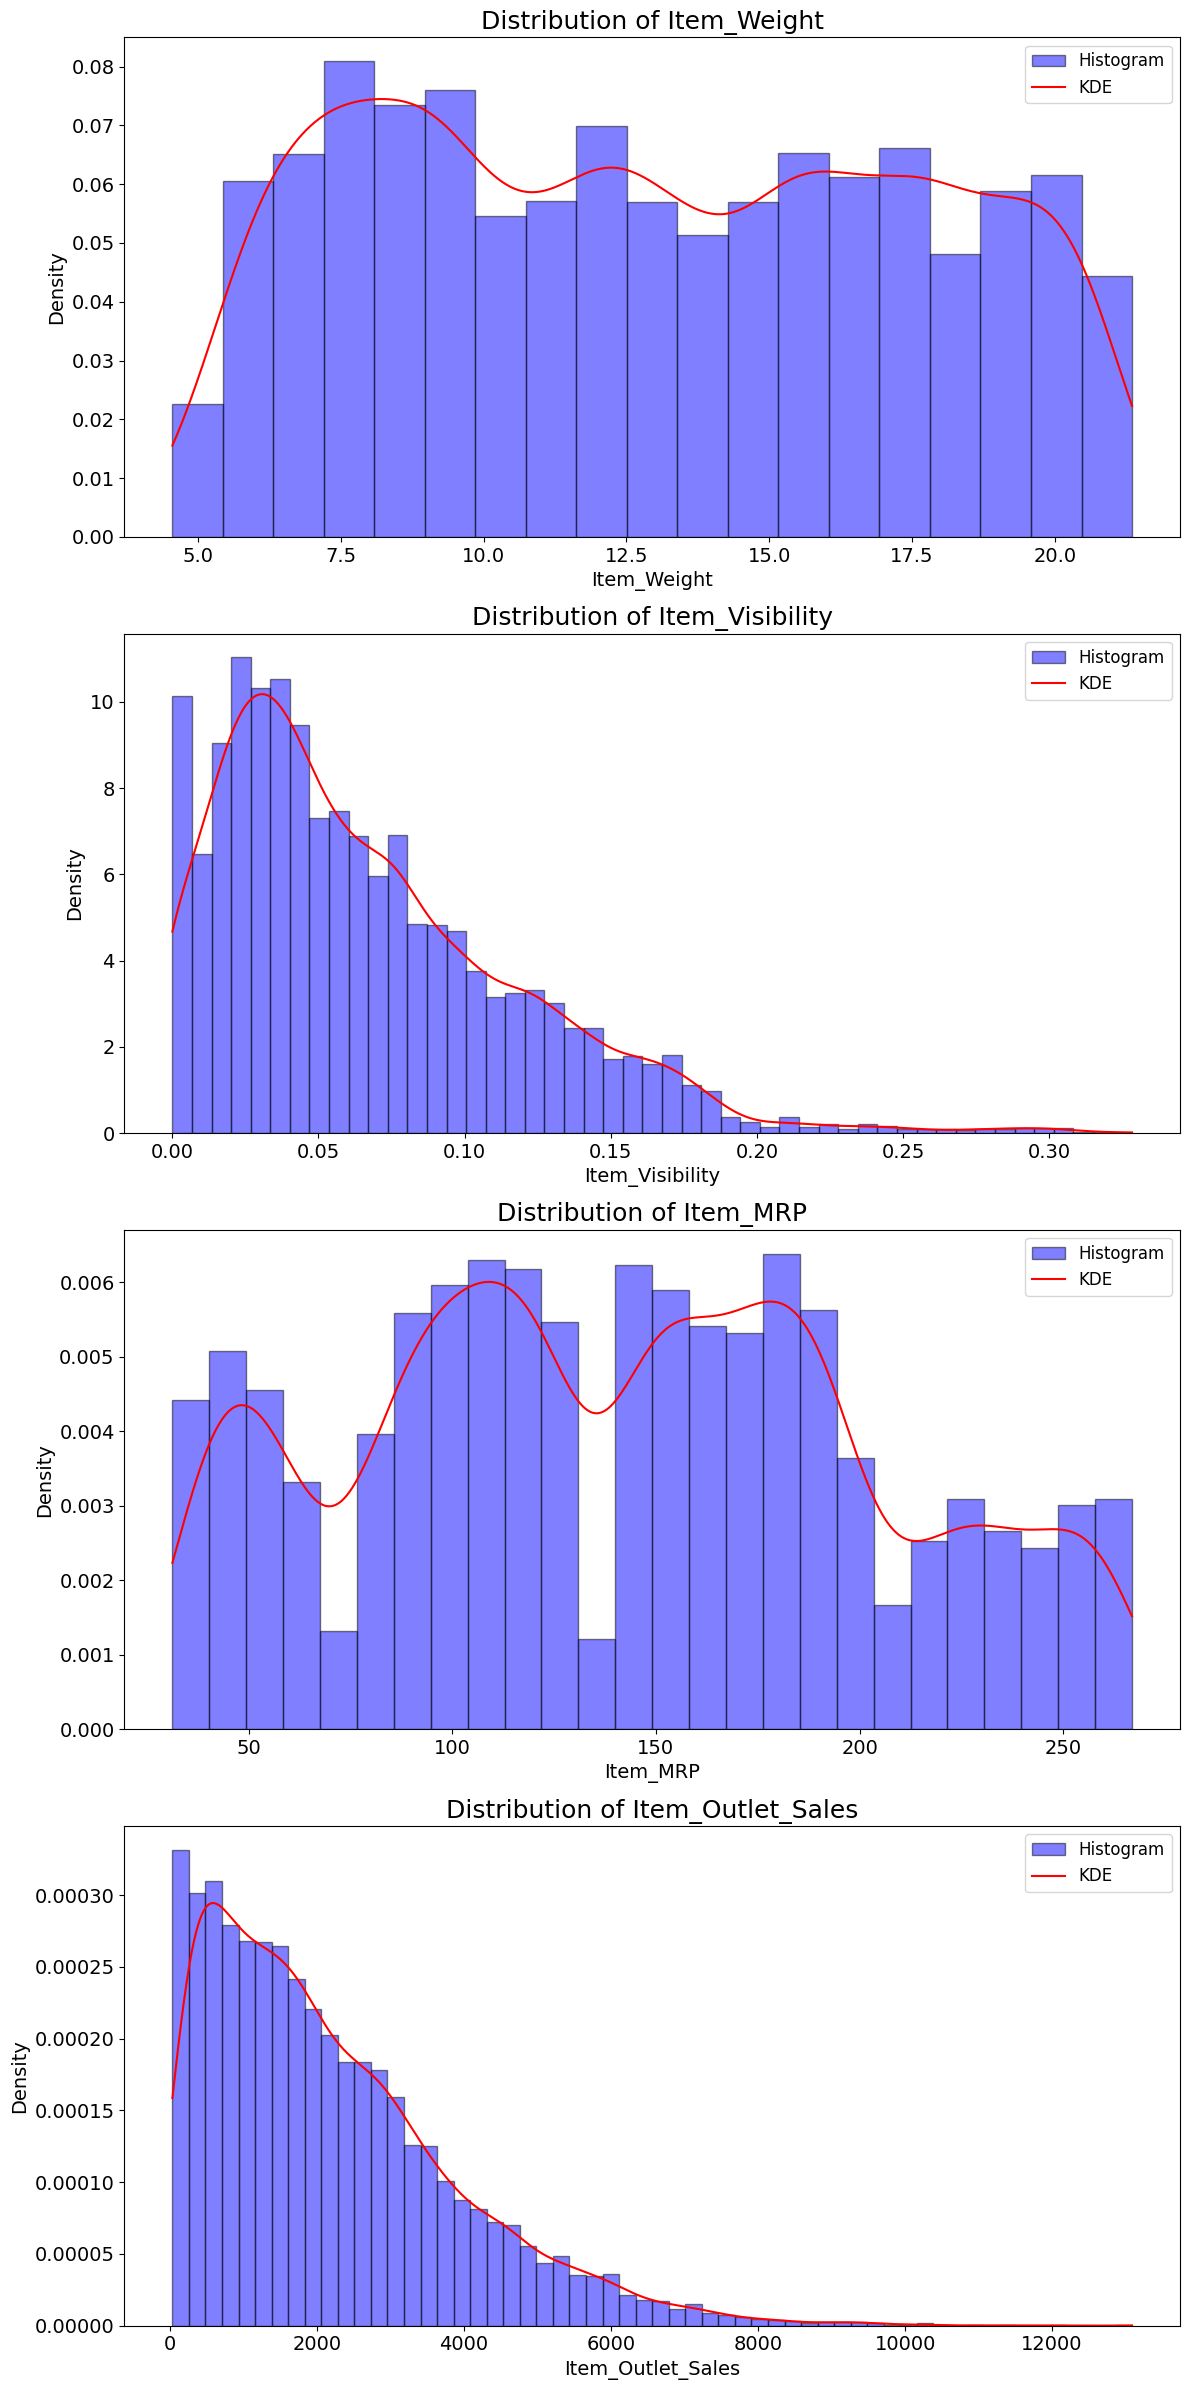

In [14]:
'''numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Item_Outlet_Sales']

fig, axs = plt.subplots(len(numerical_features), 1, figsize = (12, len(numerical_features) * 6))
fig.subplots_adjust(hspace = 0.4)
axs = axs.flatten()

for i, feature in enumerate(numerical_features):
  data = train_data[feature].dropna()

  axs[i].hist(data, bins = 30, alpha = 0.5, color = 'blue', edgecolor = 'black', density = True, label = 'Histogram')
  kde = gaussian_kde(data)
  x_range = np.linspace(data.min(), data.max(), 1000)
  axs[i].plot(x_range, kde(x_range), color = 'red', label = 'KDE')

  axs[i].set_title(f'Distribution of {feature}', fontsize = 18)
  axs[i].set_xlabel(feature, fontsize = 14)
  axs[i].set_ylabel('Density', fontsize = 14)
  axs[i].legend(fontsize = 12)
  axs[i].tick_params(axis = 'x', labelsize = 14)
  axs[i].tick_params(axis = 'y', labelsize = 14)

plt.tight_layout()
plt.show()
'''

numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

bin_widths = {}

for feature in numerical_features:
  data = train_data[feature].dropna()
  IQR = data.quantile(0.75) - data.quantile(0.25)
  bin_width = 2 * IQR / (len(data) ** (1 / 3))
  bin_widths[feature] = bin_width

print("Calculated bin widths:")
for feature, width in bin_widths.items():
  print(f"{feature}: {width}")

fig, axs = plt.subplots(len(numerical_features), 1, figsize=(12, len(numerical_features) * 6))
fig.subplots_adjust(hspace=0.4)
axs = axs.flatten()

for i, feature in enumerate(numerical_features):
  data = train_data[feature].dropna()
  bin_width = bin_widths[feature]
  min_value = data.min()
  max_value = data.max()
  num_bins = max(1, int((max_value - min_value) / bin_width))

  axs[i].hist(data, bins=num_bins, alpha=0.5, color='blue', edgecolor='black', density=True, label='Histogram')
  kde = gaussian_kde(data)
  x_range = np.linspace(data.min(), data.max(), 1000)
  axs[i].plot(x_range, kde(x_range), color='red', label='KDE')

  axs[i].set_title(f'Distribution of {feature}', fontsize=18)
  axs[i].set_xlabel(feature, fontsize=14)
  axs[i].set_ylabel('Density', fontsize=14)
  axs[i].legend(fontsize=12)
  axs[i].tick_params(axis='x', labelsize=14)
  axs[i].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()


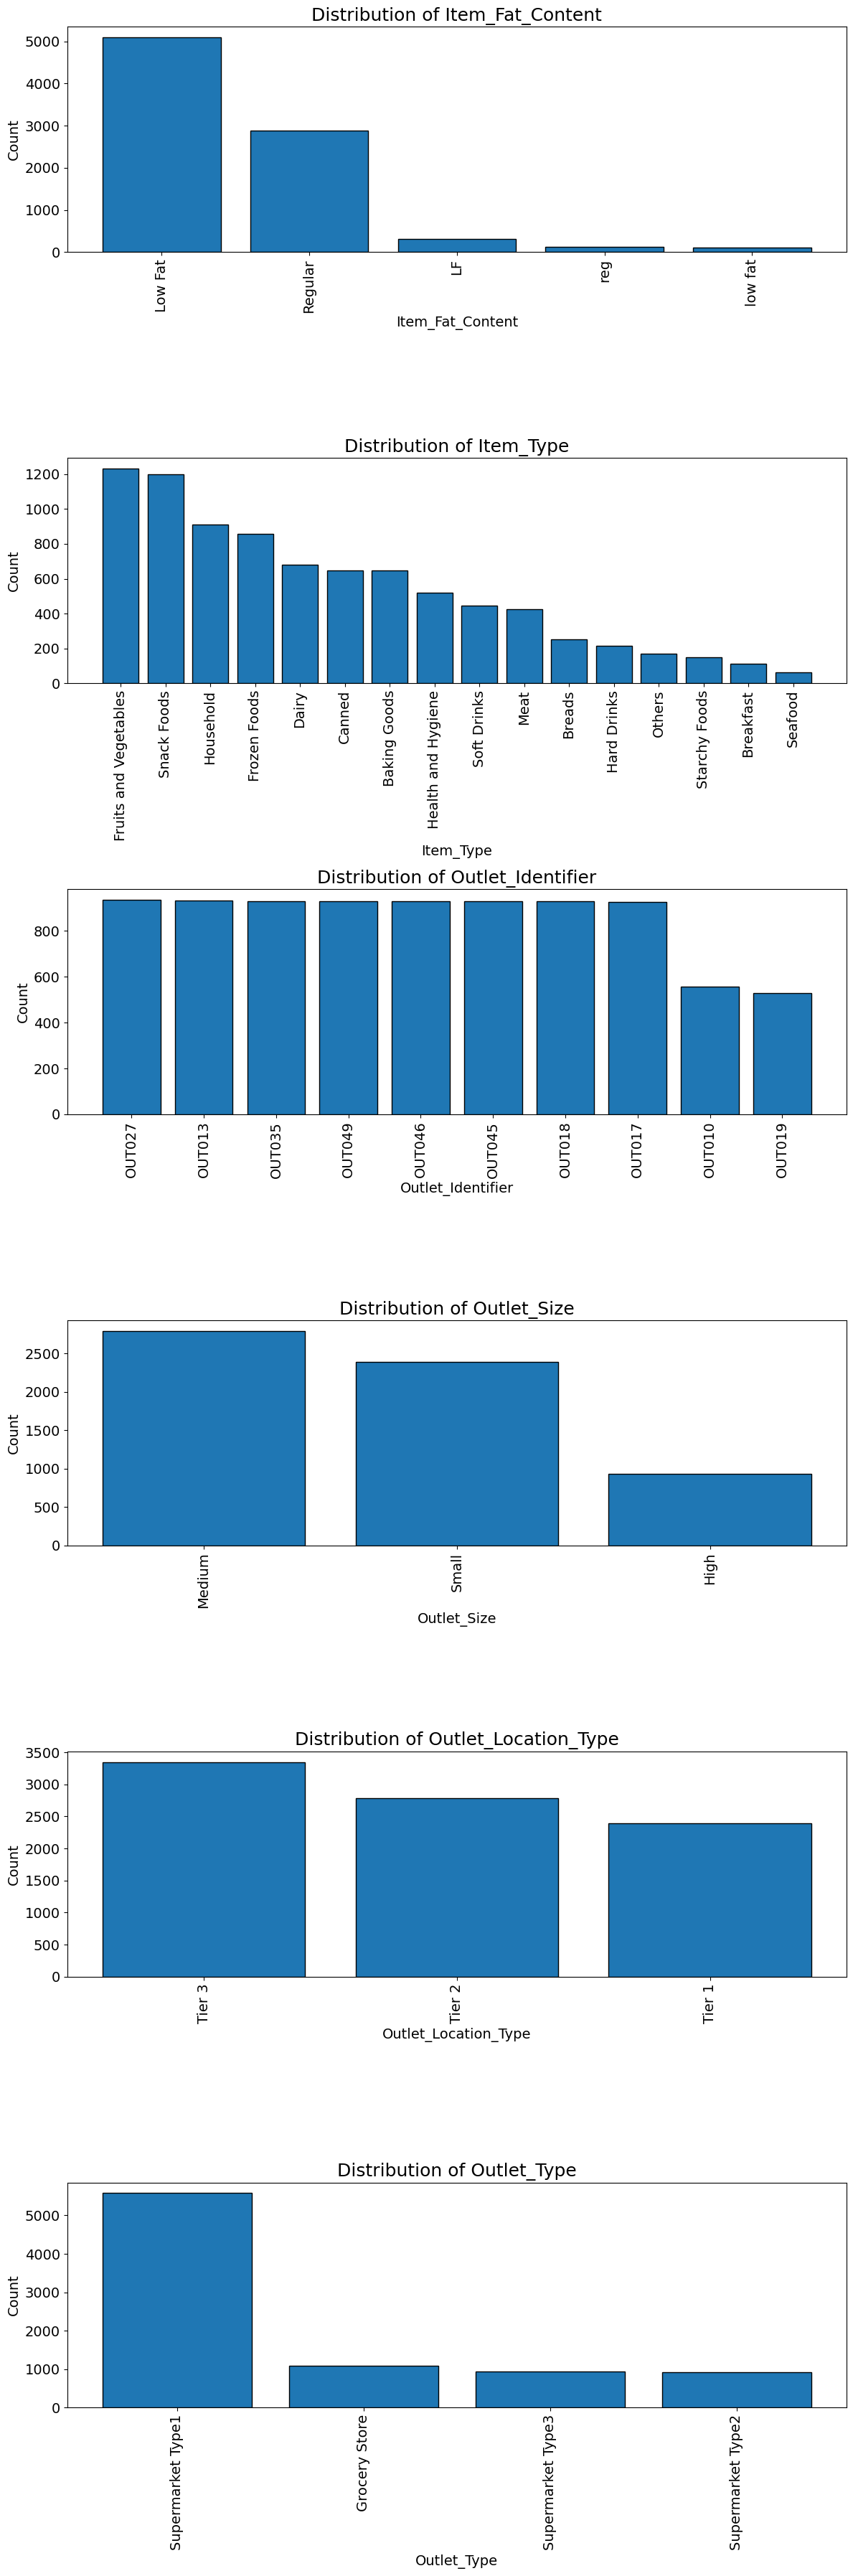

In [15]:
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

fig, axs = plt.subplots(len(categorical_features), 1, figsize=(12, len(categorical_features) * 6))
fig.subplots_adjust(hspace=0.4)
axs = axs.flatten()

for i, feature in enumerate(categorical_features):
    data = train_data[feature].value_counts()
    categories = data.index
    counts = data.values

    axs[i].bar(categories, counts, edgecolor = 'black')

    axs[i].set_title(f'Distribution of {feature}', fontsize=18)
    axs[i].set_xlabel(feature, fontsize=14)
    axs[i].set_ylabel('Count', fontsize=14)
    axs[i].tick_params(axis='x', labelsize=14, rotation=90)
    axs[i].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()



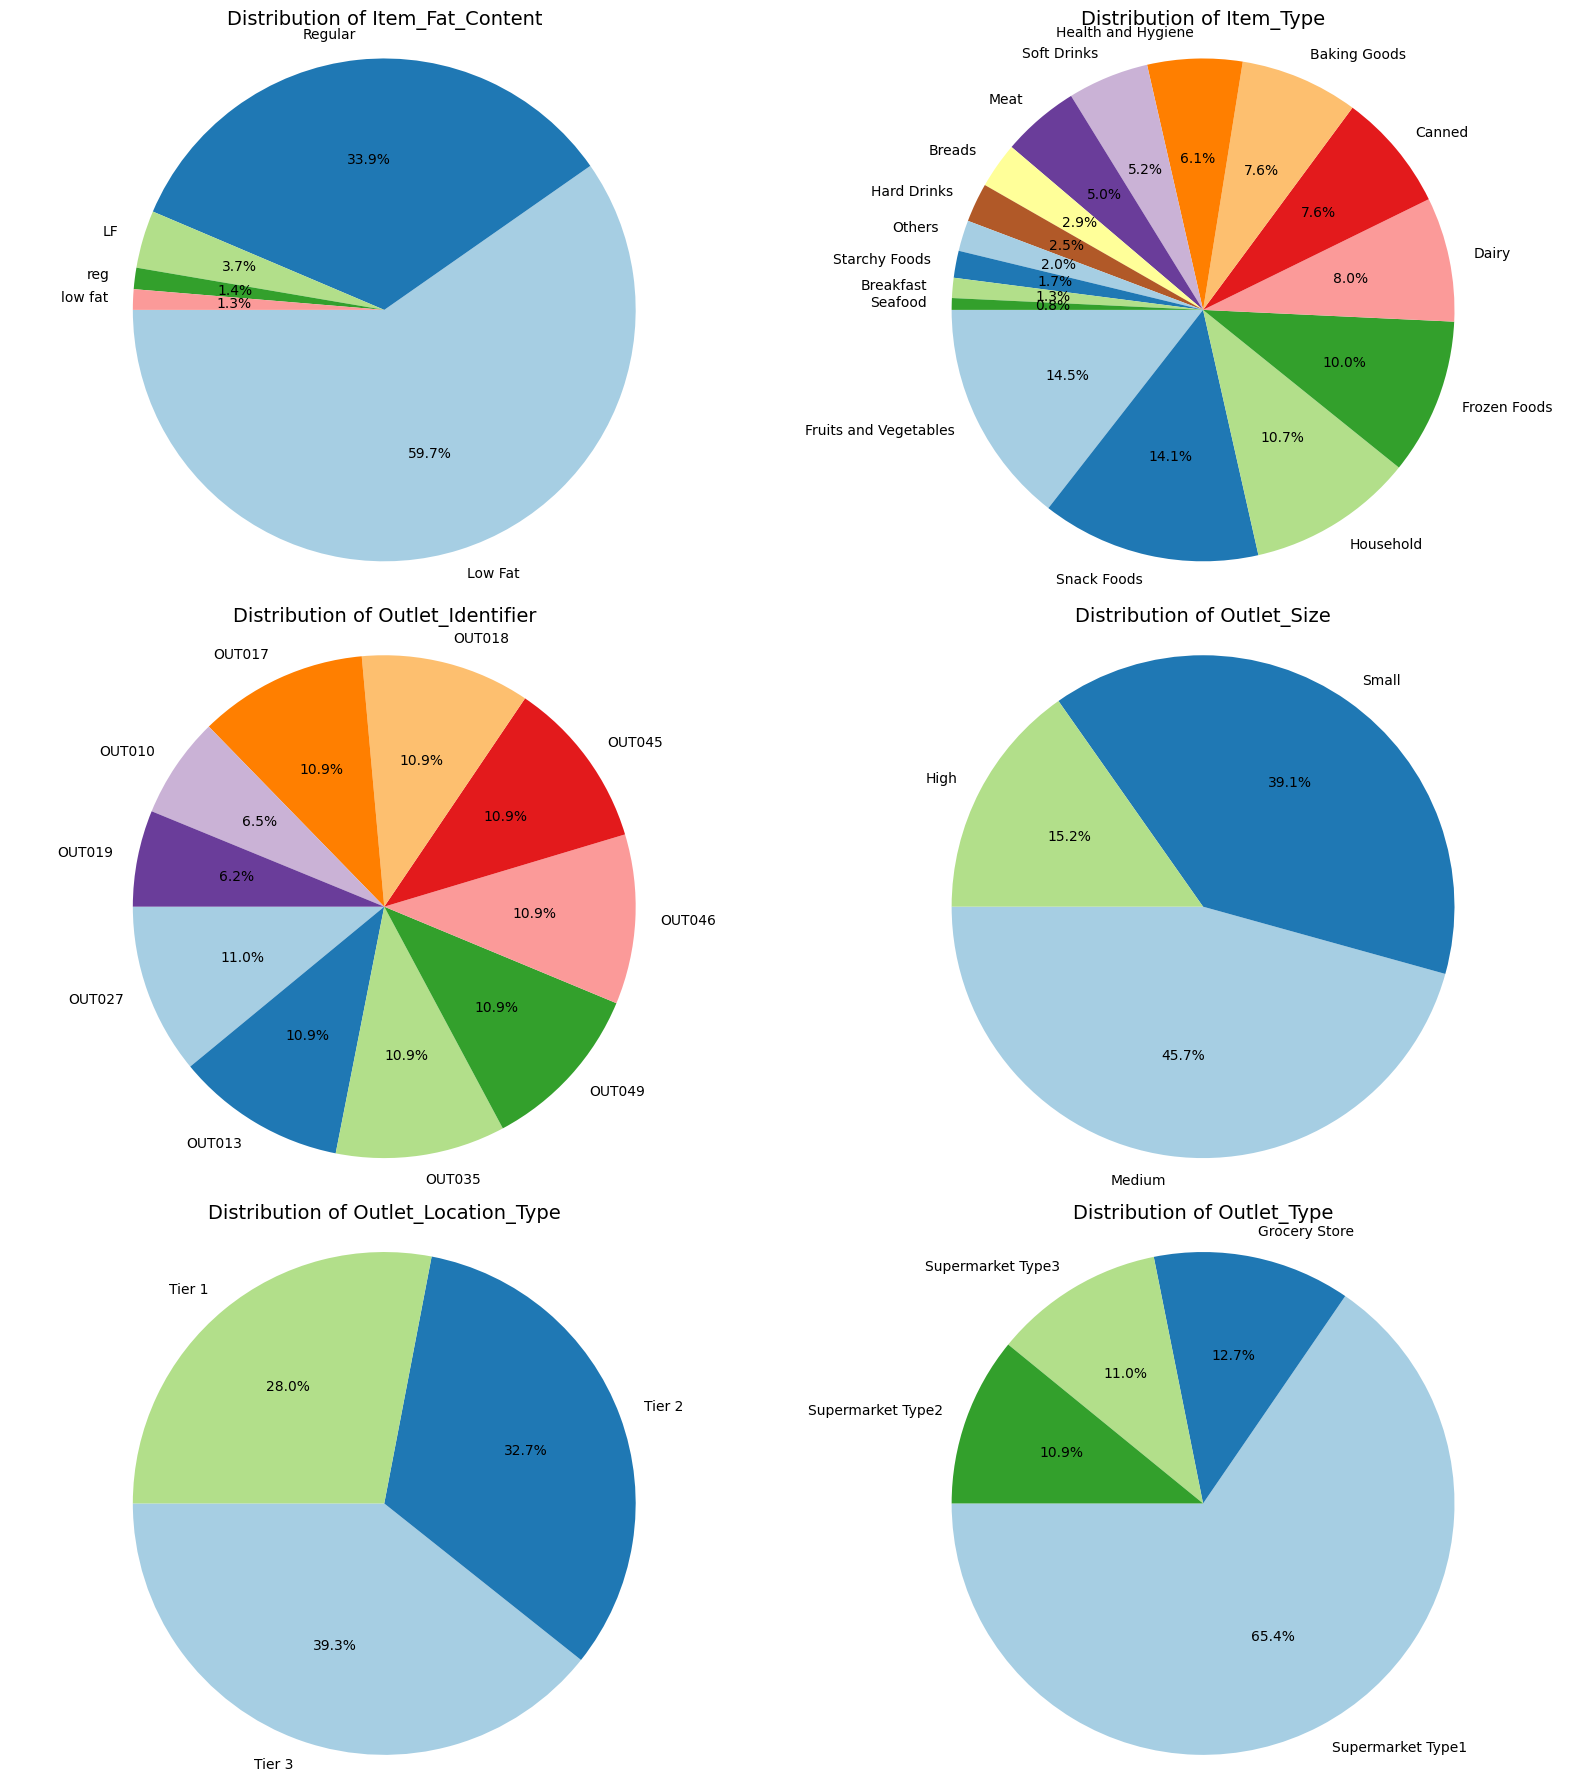

In [16]:
#Pie chart for a clear and easy visualization of the categorical features
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

num_features = len(categorical_features)
num_cols = 2
num_rows = (num_features + 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs = axs.flatten()

for i, feature in enumerate(categorical_features):
    data = train_data[feature].value_counts()
    axs[i].pie(data, labels=data.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=180)
    axs[i].set_title(f'Distribution of {feature}', fontsize=14)
    axs[i].axis('equal')

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


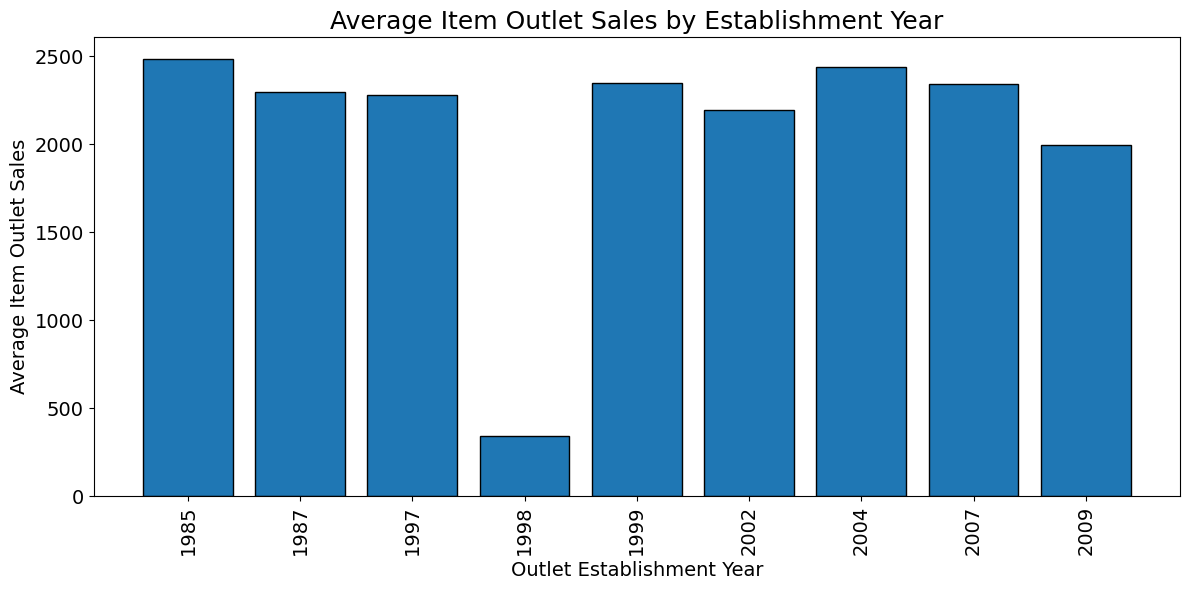

In [17]:
avg_sales_per_year = train_data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()

plt.figure(figsize=(12, 6))
plt.bar(avg_sales_per_year.index.astype(str), avg_sales_per_year.values, edgecolor = 'black')
plt.title('Average Item Outlet Sales by Establishment Year', fontsize = 18)
plt.xlabel('Outlet Establishment Year', fontsize = 14)
plt.ylabel('Average Item Outlet Sales', fontsize = 14)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.show()

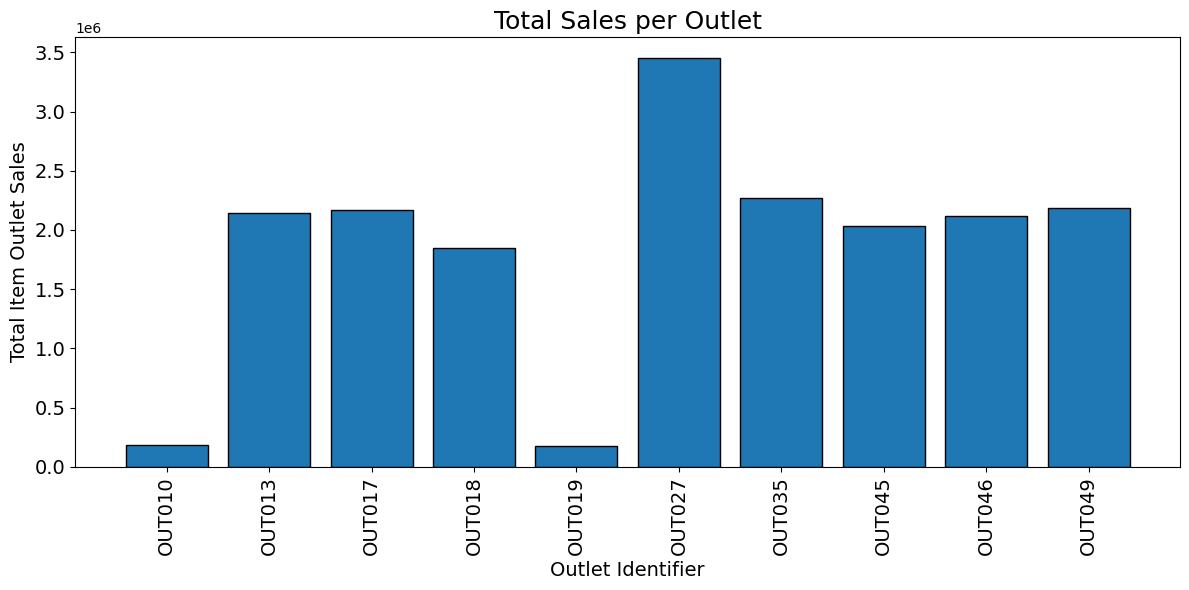

In [18]:
total_sales_per_outlet = train_data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(12, 6))

plt.bar(total_sales_per_outlet.index.astype(str), total_sales_per_outlet.values, edgecolor = 'black')
plt.title('Total Sales per Outlet', fontsize=18)
plt.xlabel('Outlet Identifier', fontsize=14)
plt.ylabel('Total Item Outlet Sales', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

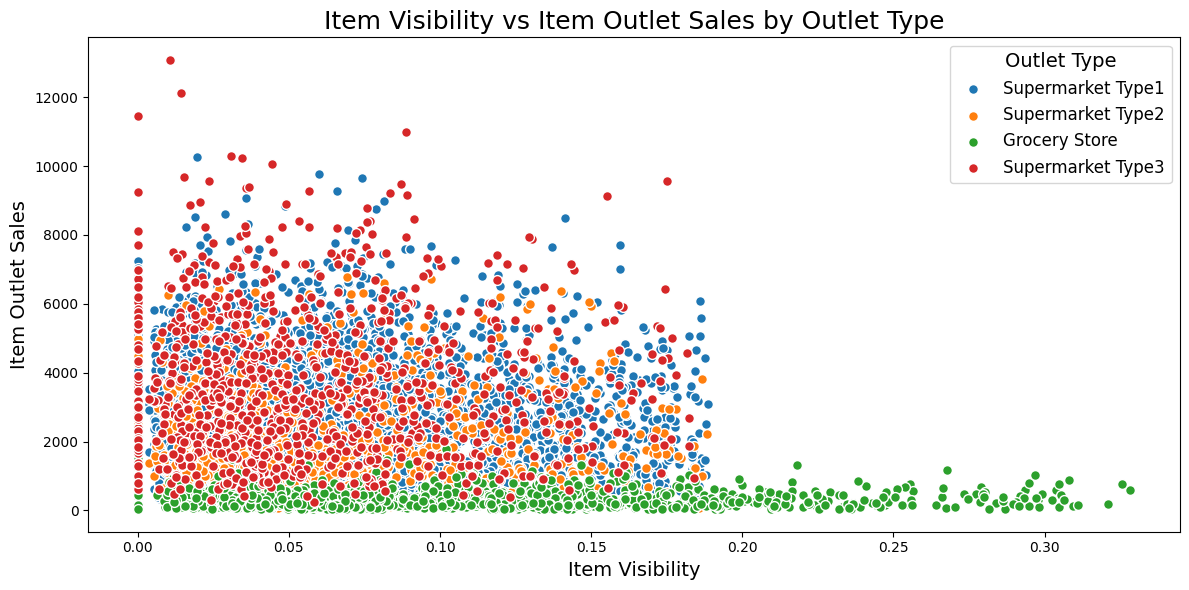

In [19]:
plt.figure(figsize=(12, 6))
for outlet_type in train_data['Outlet_Type'].unique():
    subset = train_data[train_data['Outlet_Type'] == outlet_type]
    plt.scatter(subset['Item_Visibility'], subset['Item_Outlet_Sales'], label=outlet_type, alpha = 1, edgecolor = 'white', s = 50)

plt.title('Item Visibility vs Item Outlet Sales by Outlet Type', fontsize=18)
plt.xlabel('Item Visibility', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.legend(title='Outlet Type', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

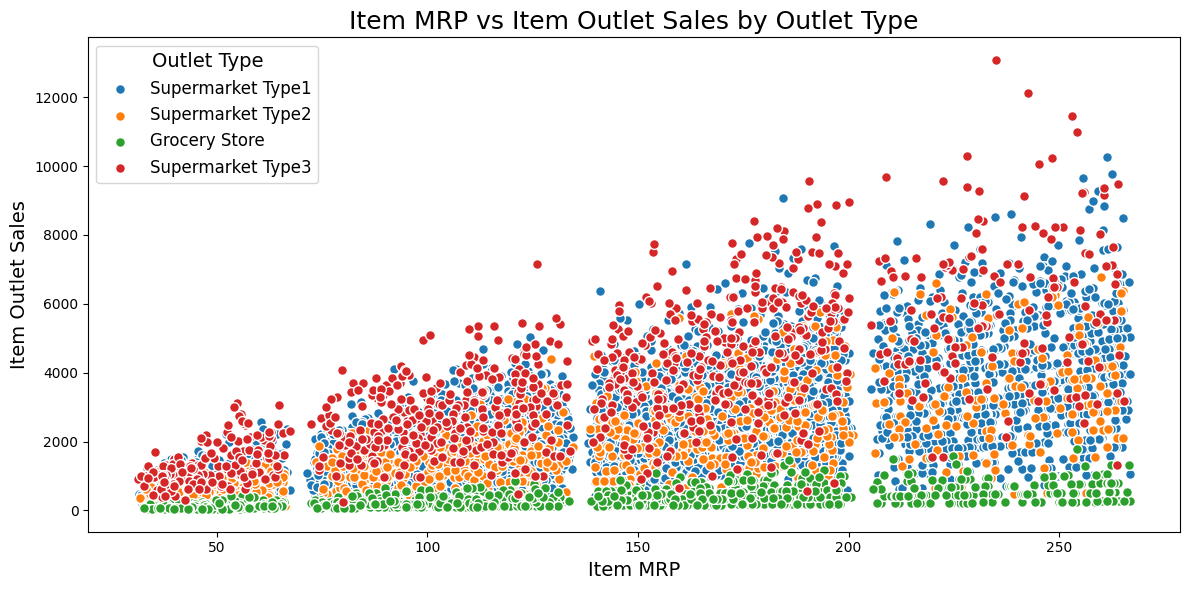

In [20]:
plt.figure(figsize=(12, 6))
for outlet_type in train_data['Outlet_Type'].unique():
    subset = train_data[train_data['Outlet_Type'] == outlet_type]
    plt.scatter(subset['Item_MRP'], subset['Item_Outlet_Sales'], label=outlet_type, alpha = 1, edgecolor = 'white', s = 50)

plt.title('Item MRP vs Item Outlet Sales by Outlet Type', fontsize=18)
plt.xlabel('Item MRP', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.legend(title='Outlet Type', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

##Advanced EDA

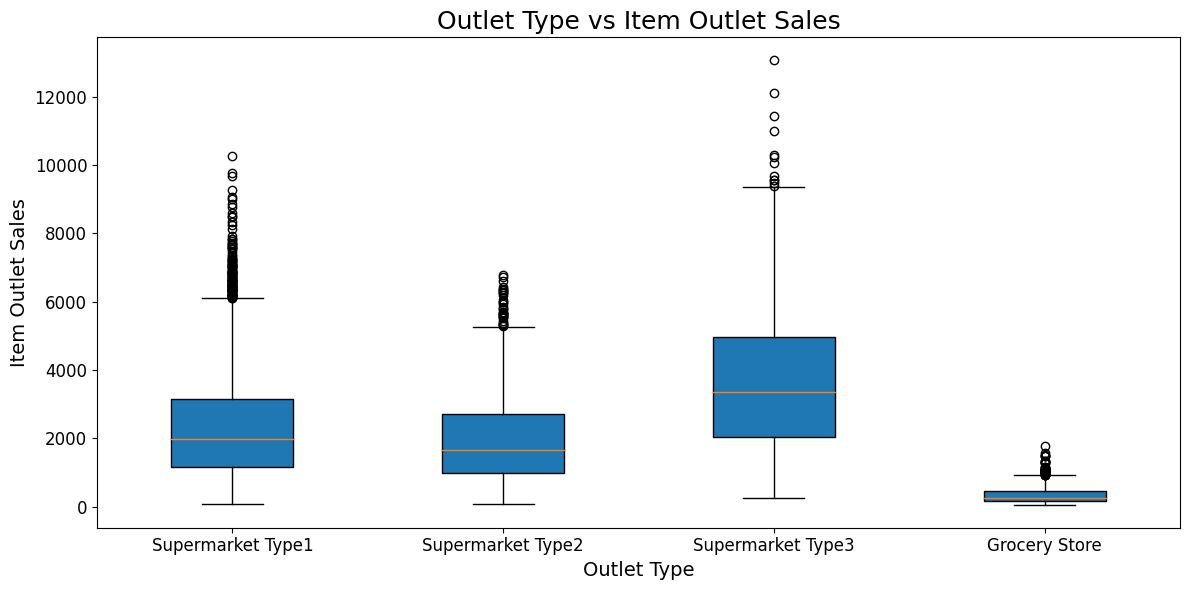

In [21]:
'''
plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Type'] == outlet]['Item_Outlet_Sales'] for outlet in train_data['Outlet_Type'].unique()], patch_artist=True)

plt.title('Outlet Type vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(train_data['Outlet_Type'].unique()) + 1), train_data['Outlet_Type'].unique(), fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
'''
outlet_type_order = ['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store']

plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Type'] == outlet]['Item_Outlet_Sales'] for outlet in outlet_type_order], patch_artist=True)

plt.title('Outlet Type vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(outlet_type_order) + 1), outlet_type_order, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

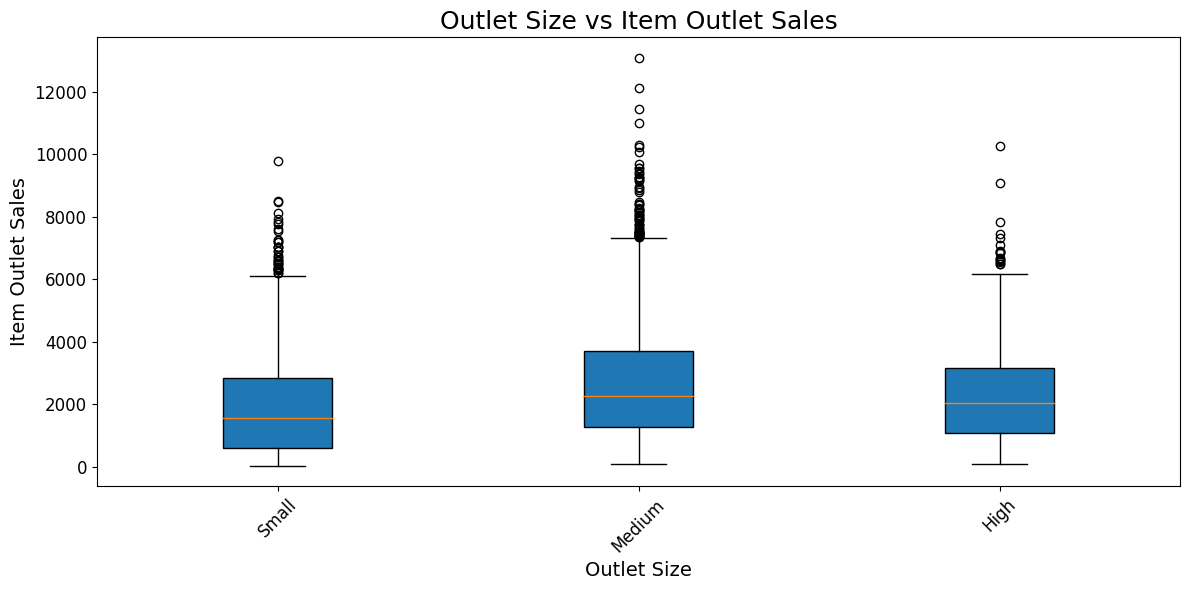

In [22]:
'''plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Size'] == size]['Item_Outlet_Sales'] for size in train_data['Outlet_Size'].unique()], patch_artist=True)

plt.title('Outlet Size vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Size', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(train_data['Outlet_Size'].unique()) + 1), train_data['Outlet_Size'].unique(), rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
'''

filtered_data = train_data.dropna(subset=['Outlet_Size'])

outlet_size_order = ['Small', 'Medium', 'High']

plt.figure(figsize=(12, 6))
plt.boxplot([filtered_data[filtered_data['Outlet_Size'] == outlet]['Item_Outlet_Sales'] for outlet in outlet_size_order], patch_artist=True)

plt.title('Outlet Size vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Size', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(outlet_size_order) + 1), outlet_size_order, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()



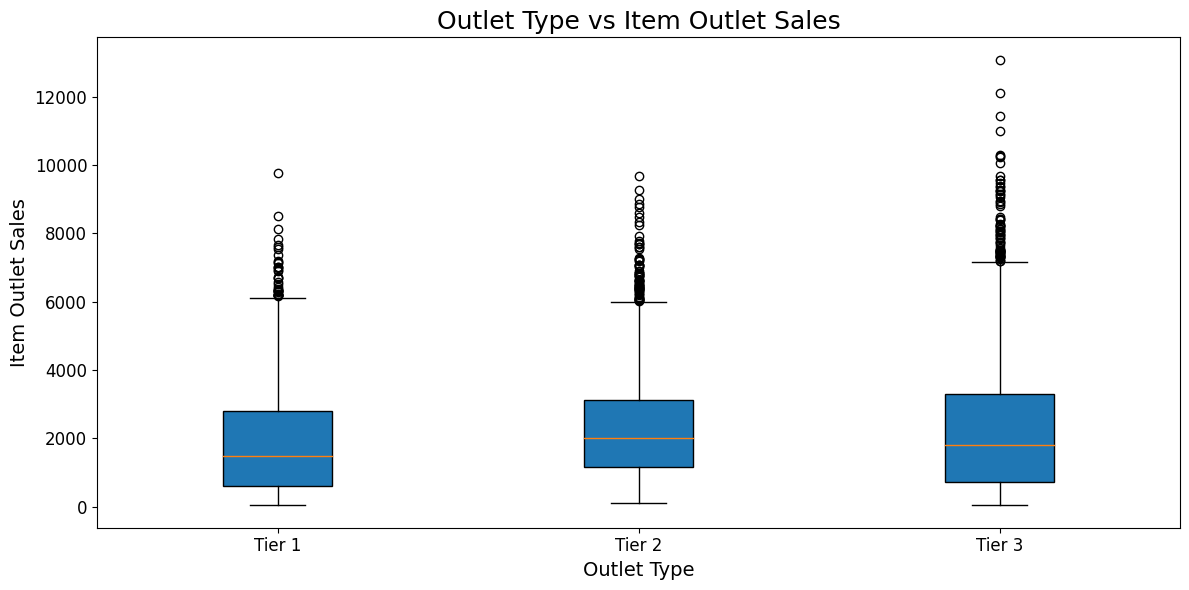

In [23]:
'''plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Location_Type'] == location]['Item_Outlet_Sales'] for location in train_data['Outlet_Location_Type'].unique()], patch_artist=True)

plt.title('Outlet Location Type vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Location Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(train_data['Outlet_Location_Type'].unique()) + 1), train_data['Outlet_Location_Type'].unique(), rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
'''

outlet_location_order = ['Tier 1', 'Tier 2', 'Tier 3']

plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Location_Type'] == location]['Item_Outlet_Sales'] for location in outlet_location_order], patch_artist=True)

plt.title('Outlet Type vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(outlet_location_order) + 1), outlet_location_order, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

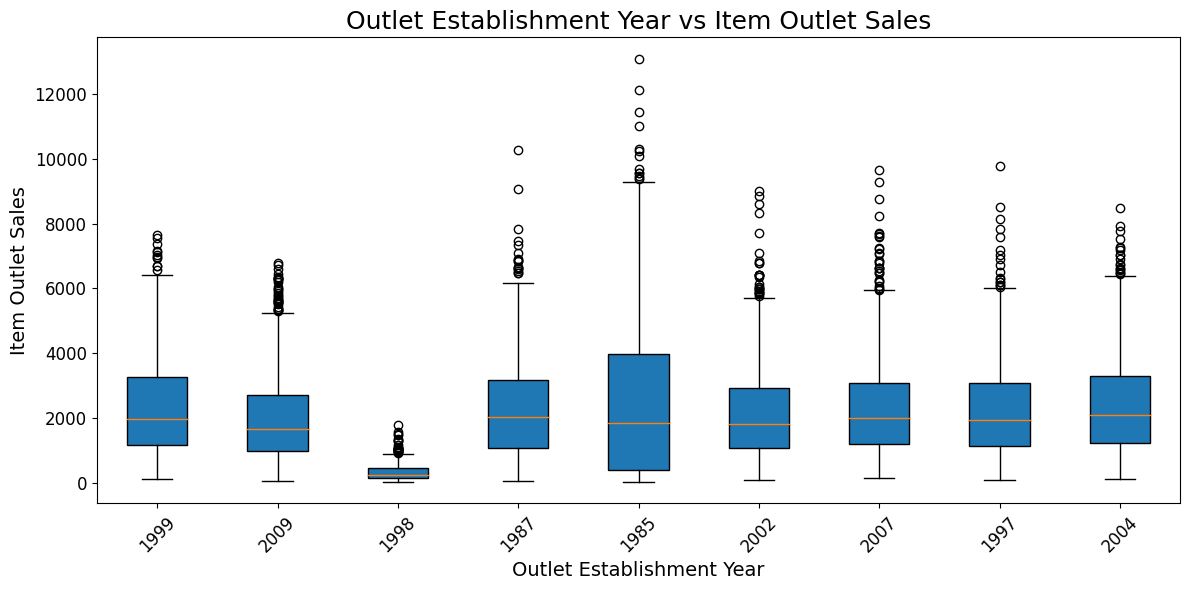

In [24]:
plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Establishment_Year'] == year]['Item_Outlet_Sales'] for year in train_data['Outlet_Establishment_Year'].unique()], patch_artist=True)

plt.title('Outlet Establishment Year vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Establishment Year', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(train_data['Outlet_Establishment_Year'].unique()) + 1), train_data['Outlet_Establishment_Year'].unique(),  rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

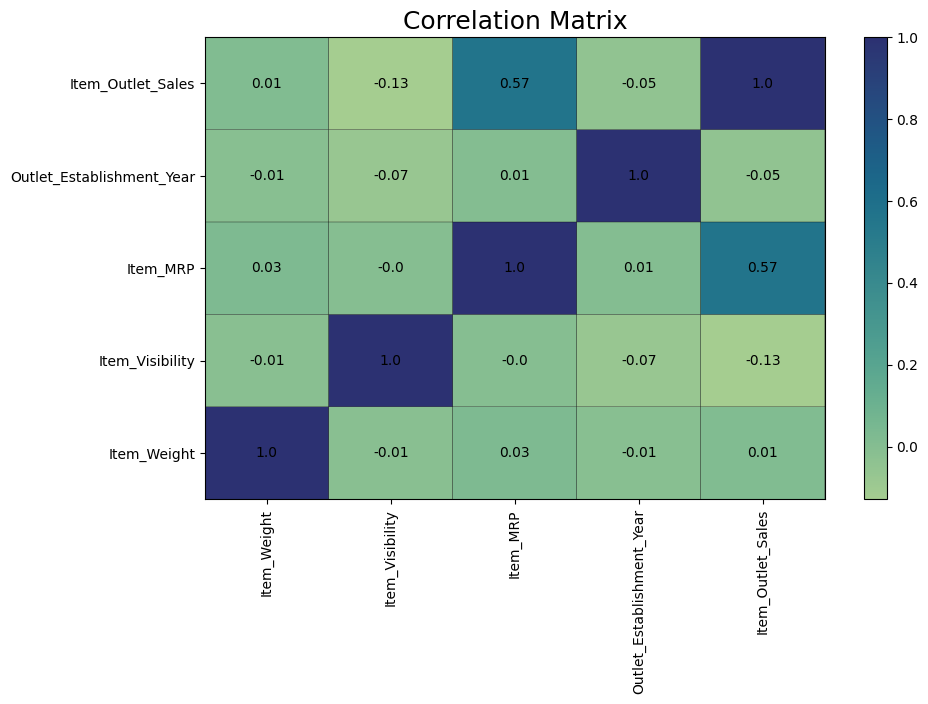

In [25]:
numeric_data = train_data.select_dtypes(include = ['float64' , 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize = (10,6))
plt.pcolor(correlation_matrix, cmap = 'crest', edgecolors = 'k', linewidths = 0.2)
plt.colorbar()

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, round(correlation_matrix.iloc[i, j], 2),
                 ha='center', va='center', color='black')

plt.xticks(np.arange(0.5, len(correlation_matrix.columns), 1), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(0.5, len(correlation_matrix.columns), 1), correlation_matrix.columns)
plt.title('Correlation Matrix', fontsize=18)

plt.show()

In [26]:
# Preserve 'Item_Identifier' and 'Outlet_Identifier' before transformation
test_identifiers = test_data[['Item_Identifier', 'Outlet_Identifier']]

##Handling missing values using imputation method

---



In [27]:
#Preprocessing the train data

train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)

In [28]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
#Preprocessing the test data

test_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
test_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)

In [30]:
#Verifying the null values
train_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [31]:
test_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


##Feature Engineering

In [32]:
#Creating a new feature Units_Sold_Per_Outlet by dividing Item_Outlet_Sales by Item_MRP
train_data['Units_Sold'] = (train_data['Item_Outlet_Sales'] / train_data['Item_MRP']).round()

units_sold_per_outlet = train_data.groupby('Outlet_Identifier')['Units_Sold'].sum().reset_index()

print(units_sold_per_outlet)

  Outlet_Identifier  Units_Sold
0            OUT010      1323.0
1            OUT013     14910.0
2            OUT017     15427.0
3            OUT018     12859.0
4            OUT019      1292.0
5            OUT027     24883.0
6            OUT035     15779.0
7            OUT045     14467.0
8            OUT046     15054.0
9            OUT049     15472.0


##Handling Outliers

In [33]:
def cap_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q1 + 1.5 * IQR

  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
  return df

def cap_outliers_grouped(df, column, group_by_column):
  df = df.groupby(group_by_column, group_keys=False).apply(lambda x: cap_outliers(x.copy(), column).reset_index(drop=True))
  return df

train_data = cap_outliers_grouped(train_data, 'Item_Outlet_Sales', 'Outlet_Type')
train_data = cap_outliers_grouped(train_data, 'Item_Outlet_Sales', 'Outlet_Size')
train_data = cap_outliers_grouped(train_data, 'Item_Outlet_Sales', 'Outlet_Establishment_Year')
train_data = cap_outliers_grouped(train_data, 'Item_Outlet_Sales', 'Outlet_Location_Type')

print("Shape of train data after capping the outliers: ", train_data.shape)

Shape of train data after capping the outliers:  (8523, 13)


In [34]:
#Standardizing the Item_Fat_Content for train data
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({
    'low fat' : 'Low Fat',
    'LF' : 'Low Fat',
    'reg' : 'Regular'
})

print("Unique Values in Item_Fat_Content after standardization: ")
print(train_data['Item_Fat_Content'].unique())

Unique Values in Item_Fat_Content after standardization: 
['Low Fat' 'Regular']


In [35]:
#Standardizing the Item_Fat_Content for test data
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({
    'low fat' : 'Low Fat',
    'LF' : 'Low Fat',
    'reg' : 'Regular'
})

print("Unique Values in Item_Fat_Content after standardization: ")
print(test_data['Item_Fat_Content'].unique())

Unique Values in Item_Fat_Content after standardization: 
['Low Fat' 'Regular']


In [36]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Units_Sold
0,FDC37,12.857645,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,2.0
1,FDC14,12.857645,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,3.0
2,FDS02,12.857645,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,611.2044,4.0
3,FDI26,12.857645,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,611.2044,5.0
4,FDY40,12.857645,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076,3.0


In [37]:
#LabelEncoding
outlet_size_mapping = {'Small': 1, 'Medium': 2, 'High': 3}
outlet_location_type_mapping = {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}
outlet_type_mapping = {'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3, 'Grocery Store': 4}
item_fat_content_mapping = {'Low Fat': 1, 'Regular': 2}

train_data['Outlet_Size'] = train_data['Outlet_Size'].map(outlet_size_mapping)
train_data['Outlet_Location_Type'] = train_data['Outlet_Location_Type'].map(outlet_location_type_mapping)
train_data['Outlet_Type'] = train_data['Outlet_Type'].map(outlet_type_mapping)
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].map(item_fat_content_mapping)

test_data['Outlet_Size'] = test_data['Outlet_Size'].map(outlet_size_mapping)
test_data['Outlet_Location_Type'] = test_data['Outlet_Location_Type'].map(outlet_location_type_mapping)
test_data['Outlet_Type'] = test_data['Outlet_Type'].map(outlet_type_mapping)
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].map(item_fat_content_mapping)

print("Unique values after label encoding(train_data):")
print("Outlet_Size:", train_data['Outlet_Size'].unique())
print("Outlet_Location_Type:", train_data['Outlet_Location_Type'].unique())
print("Outlet_Type:", train_data['Outlet_Type'].unique())
print("Item_Fat_Content:", train_data['Item_Fat_Content'].unique())

print("Unique values after label encoding(test_data):")
print("Outlet_Size:", test_data['Outlet_Size'].unique())
print("Outlet_Location_Type:", test_data['Outlet_Location_Type'].unique())
print("Outlet_Type:", test_data['Outlet_Type'].unique())
print("Item_Fat_Content:", test_data['Item_Fat_Content'].unique())

Unique values after label encoding(train_data):
Outlet_Size: [1 2 3]
Outlet_Location_Type: [1 2 3]
Outlet_Type: [4 1 3 2]
Item_Fat_Content: [1 2]
Unique values after label encoding(test_data):
Outlet_Size: [2 1 3]
Outlet_Location_Type: [1 2 3]
Outlet_Type: [1 4 3 2]
Item_Fat_Content: [1 2]


In [38]:
#OneHotEncoding

train_data_encoded = pd.get_dummies(train_data, columns=['Item_Type'], drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=['Item_Type'], drop_first=True)

missing_cols = set(train_data_encoded.columns) - set(test_data_encoded.columns)
for c in missing_cols:
    test_data_encoded[c] = 0
test_data_encoded = test_data_encoded[train_data_encoded.columns.drop('Item_Outlet_Sales')]

In [39]:
train_data_encoded.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDC37,12.857645,1,0.057557,107.6938,OUT019,1985,1,1,4,...,False,False,False,False,False,False,False,False,False,False
1,FDC14,12.857645,2,0.072222,43.6454,OUT019,1985,1,1,4,...,False,False,False,False,False,False,False,False,False,False
2,FDS02,12.857645,2,0.255395,196.8794,OUT019,1985,1,1,4,...,False,False,False,False,False,False,False,False,False,False
3,FDI26,12.857645,1,0.061082,180.0344,OUT019,1985,1,1,4,...,False,False,False,False,False,False,False,False,False,False
4,FDY40,12.857645,2,0.150286,51.0692,OUT019,1985,1,1,4,...,False,False,False,False,False,False,False,False,False,False


In [40]:
train_data_encoded.shape

(8523, 27)

In [41]:
test_data_encoded.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDW58,20.750000,1,0.007565,107.8622,OUT049,1999,2,1,1,...,False,False,False,False,False,False,False,True,False,False
1,FDW14,8.300000,2,0.038428,87.3198,OUT017,2007,2,2,1,...,False,False,False,False,False,False,False,False,False,False
2,NCN55,14.600000,1,0.099575,241.7538,OUT010,1998,2,3,4,...,False,False,False,False,False,True,False,False,False,False
3,FDQ58,7.315000,1,0.015388,155.0340,OUT017,2007,2,2,1,...,False,False,False,False,False,False,False,True,False,False
4,FDY38,12.857645,2,0.118599,234.2300,OUT027,1985,2,3,3,...,False,False,False,False,False,False,False,False,False,False


In [42]:
test_data_encoded.shape

(5681, 26)

##EDA after preprocessing

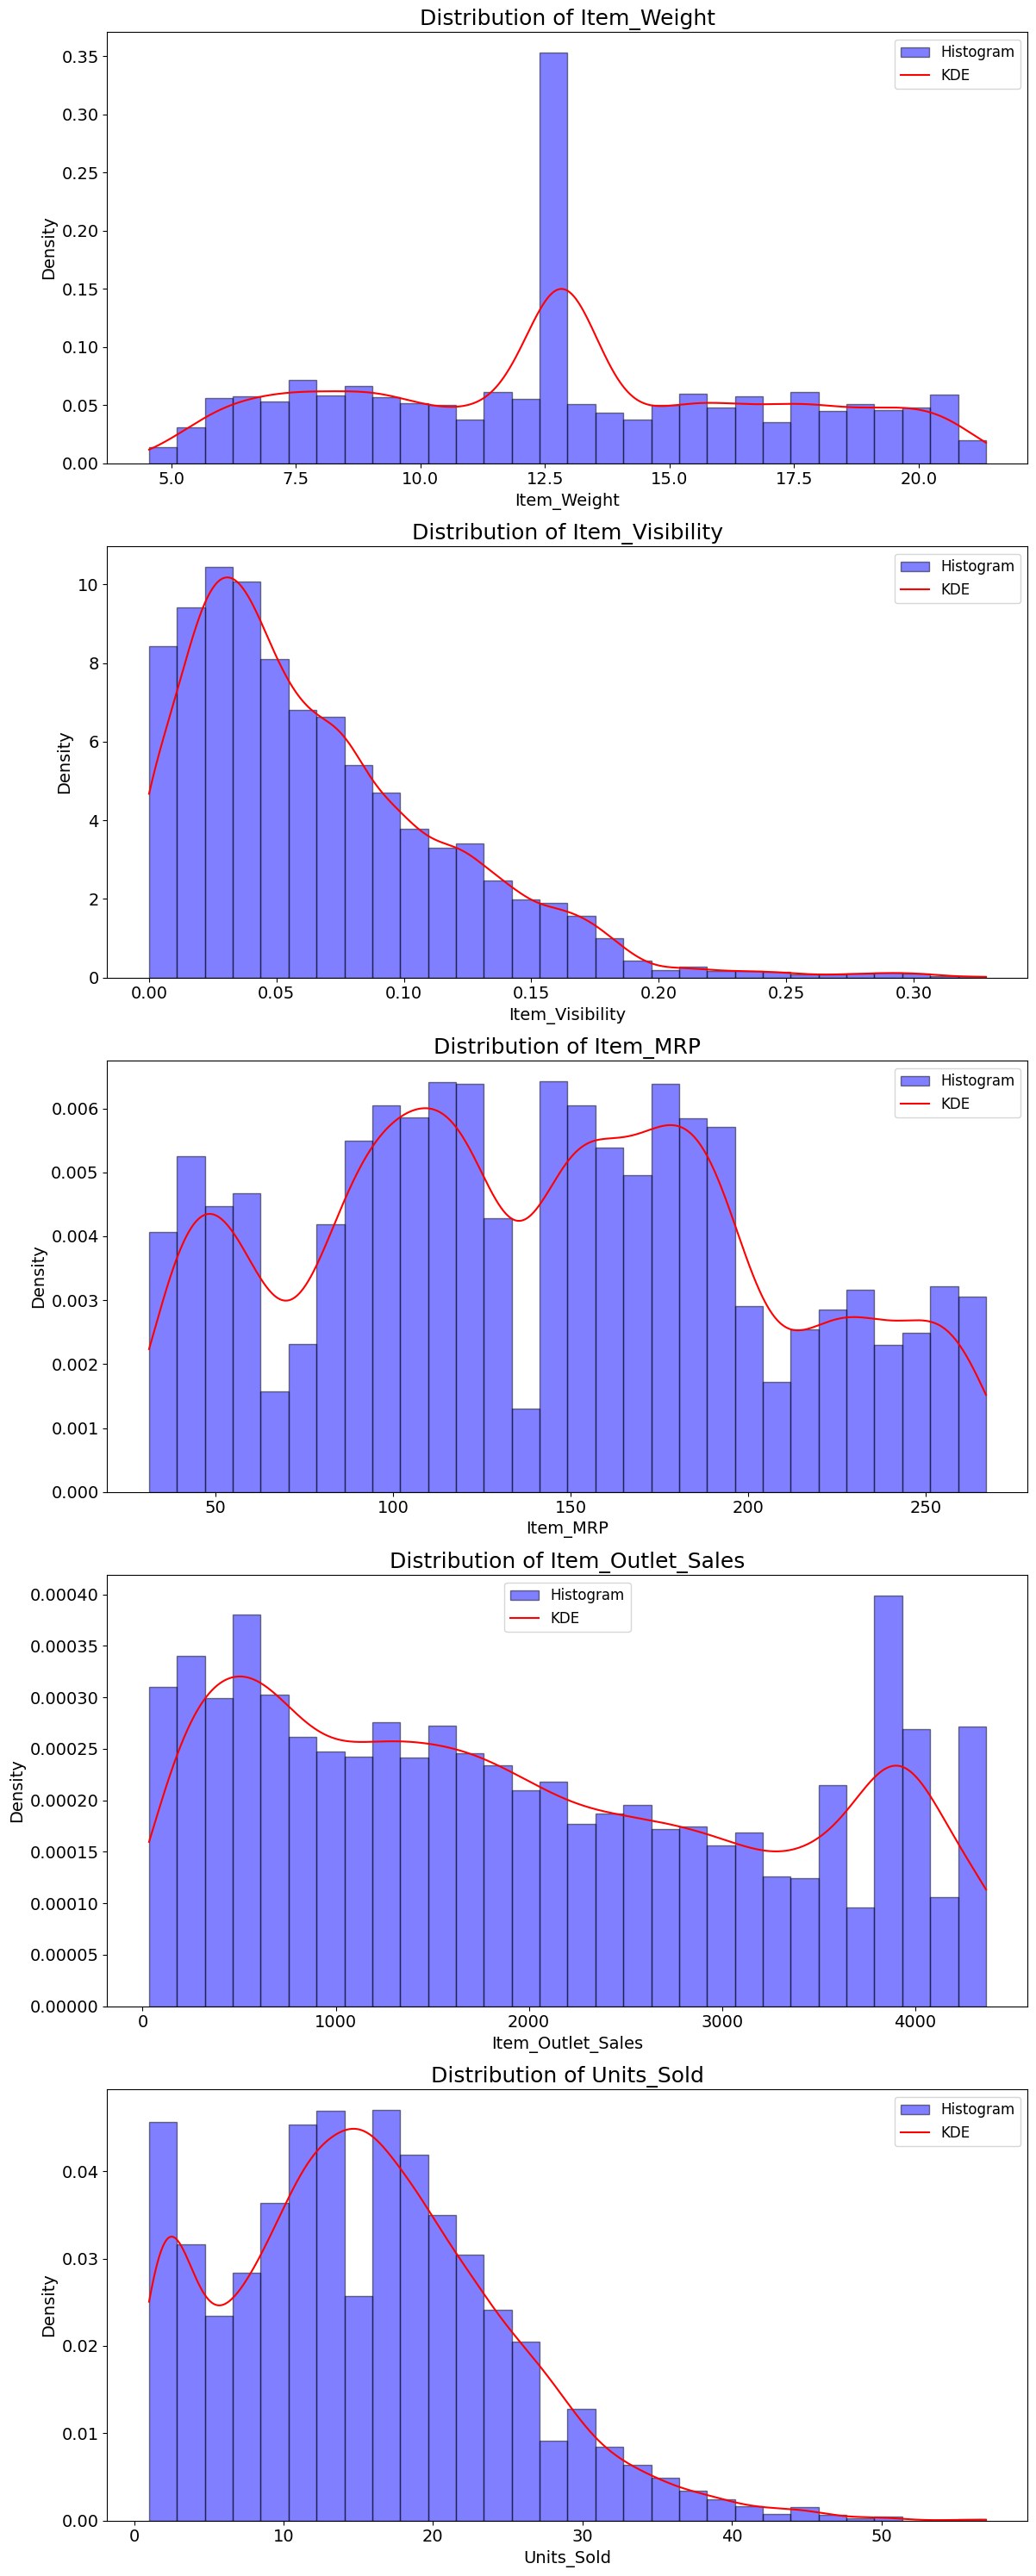

In [43]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Units_Sold']

fig, axs = plt.subplots(len(numerical_features), 1, figsize=(12, len(numerical_features) * 6))
fig.subplots_adjust(hspace=0.4)
axs = axs.flatten()

for i, feature in enumerate(numerical_features):
    data = train_data_encoded[feature].dropna()

    # Histogram
    axs[i].hist(data, bins=30, alpha=0.5, color='blue', edgecolor='black', density=True, label='Histogram')

    # KDE
    kde = gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 1000)
    axs[i].plot(x_range, kde(x_range), color='red', label='KDE')

    # Customizing plot
    axs[i].set_title(f'Distribution of {feature}', fontsize=18)
    axs[i].set_xlabel(feature, fontsize=14)
    axs[i].set_ylabel('Density', fontsize=14)
    axs[i].legend(fontsize=12)
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

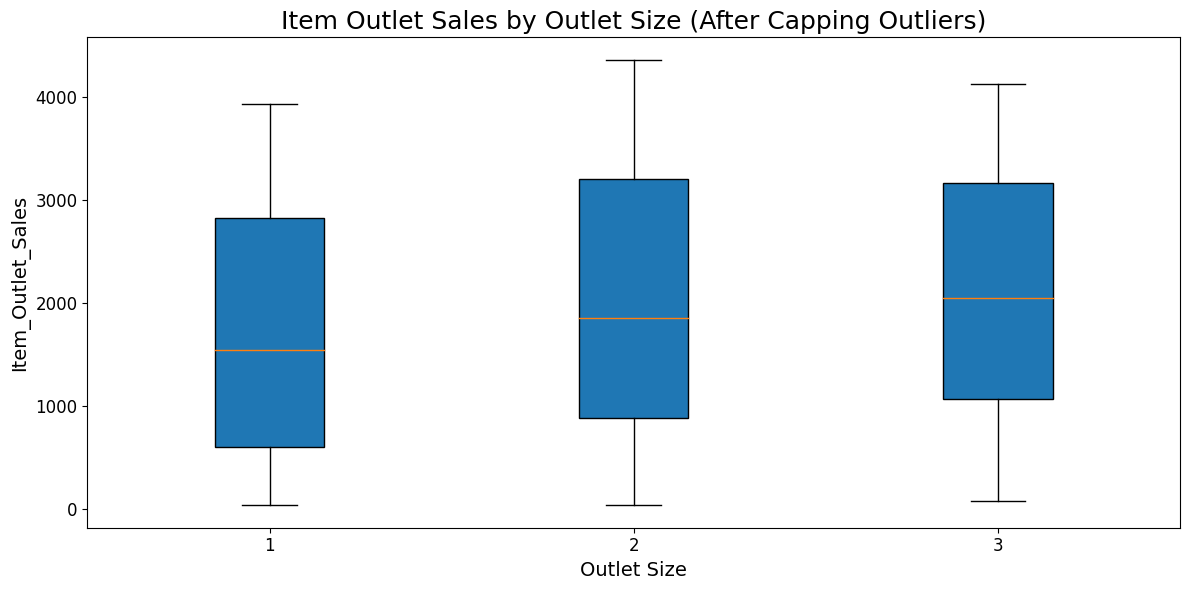

In [44]:
plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Size']== outlet]['Item_Outlet_Sales']for outlet in sorted(train_data['Outlet_Size'].unique())],patch_artist = True)

plt.title('Item Outlet Sales by Outlet Size (After Capping Outliers)', fontsize=18)
plt.xlabel('Outlet Size', fontsize = 14)
plt.ylabel('Item_Outlet_Sales', fontsize = 14)

outlet_size_labels = ['1', '2', '3']
plt.xticks(range(1,len(outlet_size_labels) + 1), outlet_size_labels, fontsize = 12)
plt.yticks(fontsize = 12)

plt.tight_layout()
plt.show()

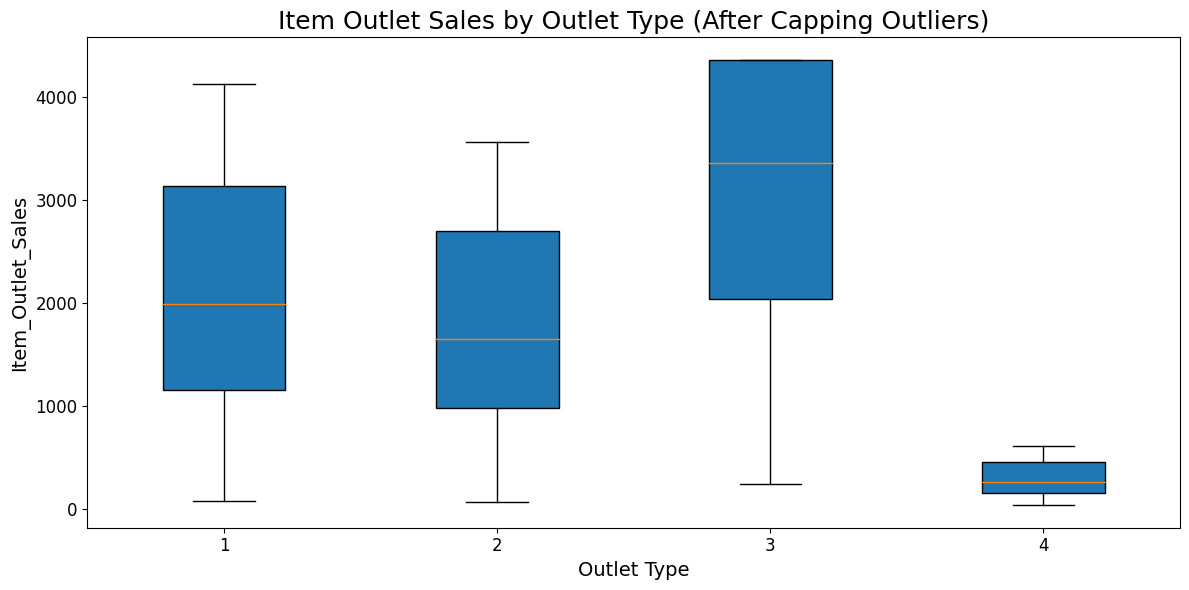

In [45]:
plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Type']== outlet]['Item_Outlet_Sales']for outlet in sorted(train_data['Outlet_Type'].unique())],patch_artist = True)

plt.title('Item Outlet Sales by Outlet Type (After Capping Outliers)', fontsize=18)
plt.xlabel('Outlet Type', fontsize = 14)
plt.ylabel('Item_Outlet_Sales', fontsize = 14)

outlet_type_labels = ['1', '2', '3', '4']
plt.xticks(range(1,len(outlet_type_labels) + 1), outlet_type_labels, fontsize = 12)
plt.yticks(fontsize = 12)

plt.tight_layout()
plt.show()

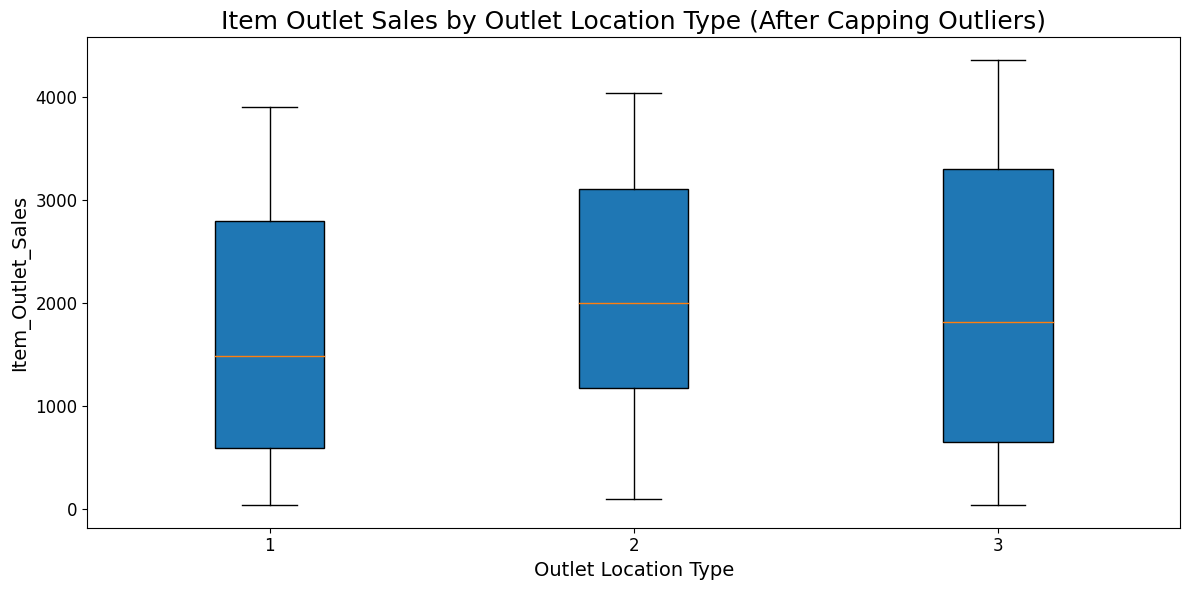

In [46]:
plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Location_Type']== outlet]['Item_Outlet_Sales']for outlet in sorted(train_data['Outlet_Location_Type'].unique())],patch_artist = True)

plt.title('Item Outlet Sales by Outlet Location Type (After Capping Outliers)', fontsize=18)
plt.xlabel('Outlet Location Type', fontsize = 14)
plt.ylabel('Item_Outlet_Sales', fontsize = 14)

outlet_location_labels = ['1', '2', '3']
plt.xticks(range(1,len(outlet_location_labels) + 1), outlet_location_labels, fontsize = 12)
plt.yticks(fontsize = 12)

plt.tight_layout()
plt.show()

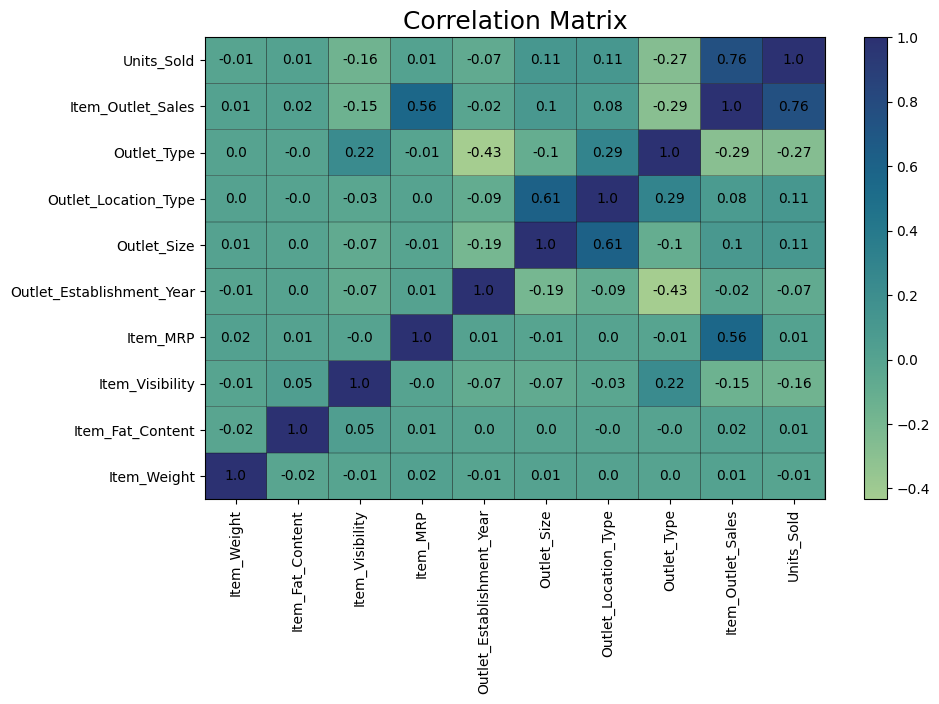

In [47]:
numeric_data_encoded = train_data_encoded.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data_encoded.corr()

plt.figure(figsize=(10,6))
plt.pcolor(correlation_matrix, cmap='crest', linewidths=0.2, edgecolors='k')
plt.colorbar()

for i in range(len(correlation_matrix.columns)):
  for j in range(len(correlation_matrix.columns)):
    plt.text(j + 0.5, i + 0.5, round(correlation_matrix.iloc[i, j], 2),ha='center', va='center', color='black')

plt.xticks(np.arange(0.5, len(correlation_matrix.columns), 1), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(0.5, len(correlation_matrix.columns), 1), correlation_matrix.columns)
plt.title('Correlation Matrix', fontsize=18)

plt.show()


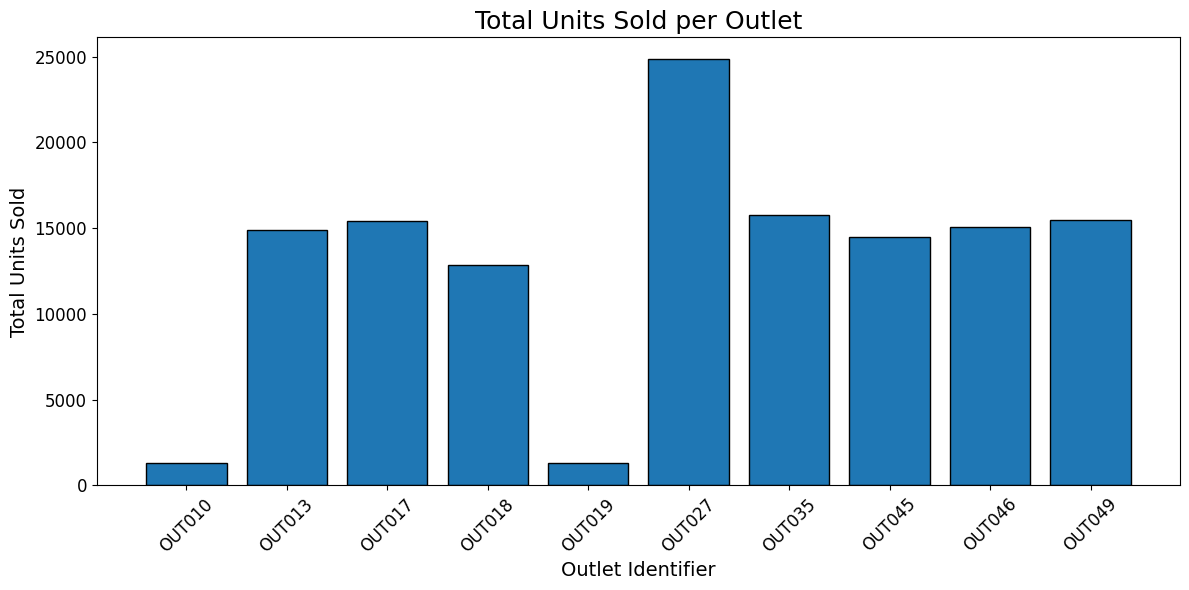

In [48]:
units_sold_per_outlet = train_data.groupby('Outlet_Identifier')['Units_Sold'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(units_sold_per_outlet['Outlet_Identifier'], units_sold_per_outlet['Units_Sold'], edgecolor = 'black')

plt.title('Total Units Sold per Outlet', fontsize=18)
plt.xlabel('Outlet Identifier', fontsize=14)
plt.ylabel('Total Units Sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


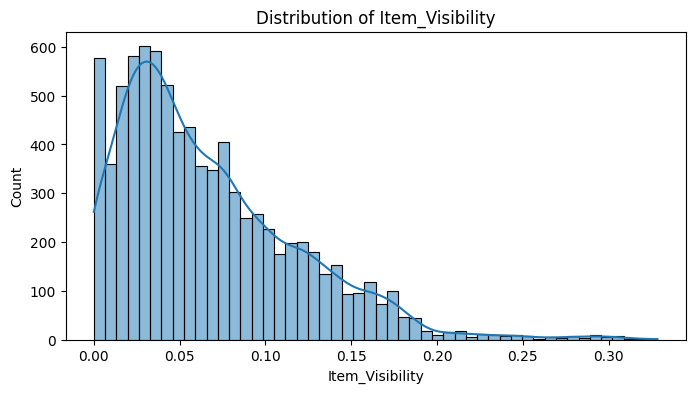

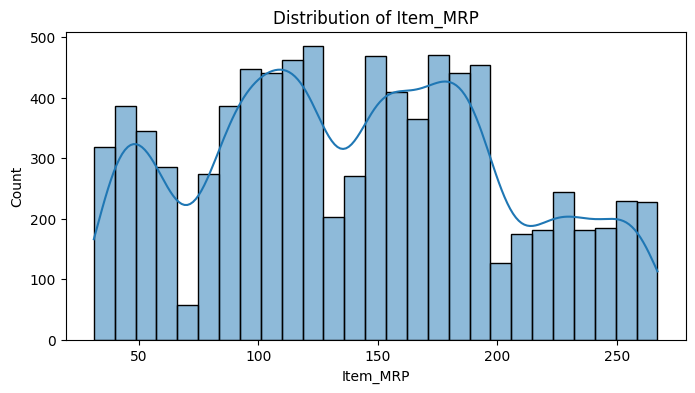

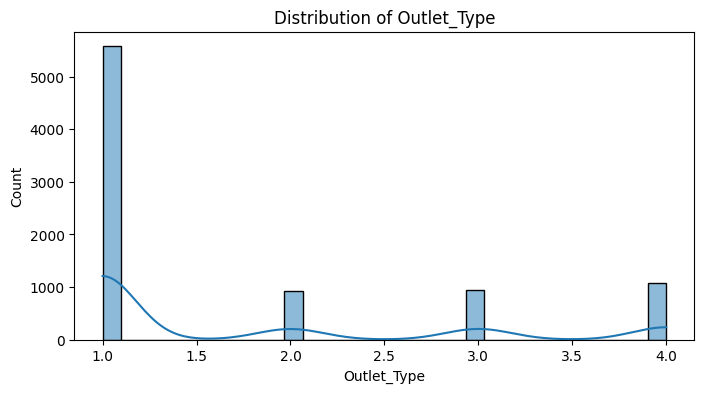

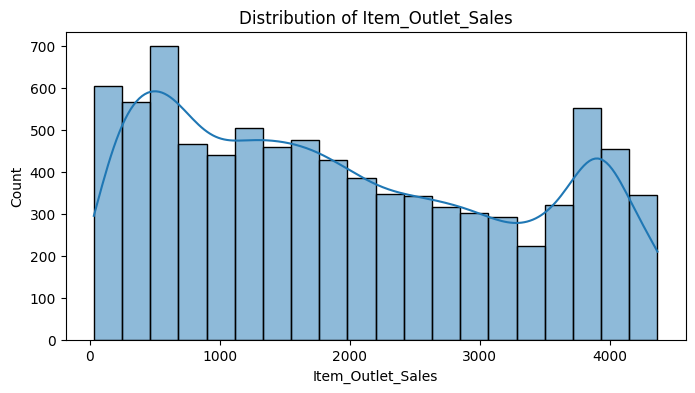

Skewness of Item_Visibility: 1.1670905496918405
Skewness of Item_MRP: 0.12720226831105258
Skewness of Outlet_Type: 1.1832385719346927
Skewness of Item_Outlet_Sales: 0.2846670471777303


In [49]:
features_to_check = ['Item_Visibility', 'Item_MRP', 'Outlet_Type']

for feature in features_to_check:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data_encoded[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(train_data_encoded['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.show()

for feature in features_to_check:
    skewness = train_data_encoded[feature].skew()
    print(f'Skewness of {feature}: {skewness}')

target_skewness = train_data_encoded['Item_Outlet_Sales'].skew()
print(f'Skewness of Item_Outlet_Sales: {target_skewness}')

In [50]:
train_data_encoded['Item_Visibility'] = np.log1p(train_data_encoded['Item_Visibility'])
test_data_encoded['Item_Visibility'] = np.log1p(test_data_encoded['Item_Visibility'])
train_data_encoded['Outlet_Type'] = np.log1p(train_data_encoded['Outlet_Type'])
test_data_encoded['Outlet_Type'] = np.log1p(test_data_encoded['Outlet_Type'])


##Regression Analysis

In [51]:
print(train_data.describe())

       Item_Weight  Item_Fat_Content  Item_Visibility     Item_MRP  \
count  8523.000000       8523.000000      8523.000000  8523.000000   
mean     12.857645          1.352693         0.066132   140.992782   
std       4.226124          0.477836         0.051598    62.275067   
min       4.555000          1.000000         0.000000    31.290000   
25%       9.310000          1.000000         0.026989    93.826500   
50%      12.857645          1.000000         0.053931   143.012800   
75%      16.000000          2.000000         0.094585   185.643700   
max      21.350000          2.000000         0.328391   266.888400   

       Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
count                8523.000000  8523.000000           8523.000000   
mean                 1997.831867     1.829168              2.112871   
std                     8.371760     0.600327              0.812757   
min                  1985.000000     1.000000              1.000000   
25%           

In [52]:
X = train_data_encoded[['Item_Visibility', 'Item_MRP', 'Outlet_Type']]
y = train_data_encoded['Item_Outlet_Sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = regressor.predict(X_val)

print(f'Mean Squared Error: {mean_squared_error(y_val, y_pred)}')
print(f'R^2 Score: {r2_score(y_val, y_pred)}')

Mean Squared Error: 1082992.9803290074
R^2 Score: 0.36485691601699843


##Polynomial regression for better score



In [55]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(train_data_encoded[['Item_Visibility', 'Item_MRP', 'Outlet_Type']])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, train_data['Item_Outlet_Sales'], test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred_val = best_rf.predict(X_val)
y_pred_train = best_rf.predict(X_train)

mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f'Validation Set - Mean Squared Error: {mse_val}, R^2 Score: {r2_val}')
print(f'Training Set - Mean Squared Error: {mse_train}, R^2 Score: {r2_train}')

Validation Set - Mean Squared Error: 599872.122731291, R^2 Score: 0.648192890492019
Training Set - Mean Squared Error: 466084.66582605796, R^2 Score: 0.7274713280913501


In [56]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(train_data_encoded[['Item_Visibility', 'Item_MRP', 'Outlet_Type']])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, train_data['Item_Outlet_Sales'], test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = xgb.XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, scoring='r2', n_jobs=-1, cv=5, random_state=42)
random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_

y_pred_val = best_xgb.predict(X_val)
y_pred_train = best_xgb.predict(X_train)

mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f'Validation Set - Mean Squared Error: {mse_val}, R^2 Score: {r2_val}')
print(f'Training Set - Mean Squared Error: {mse_train}, R^2 Score: {r2_train}')

Validation Set - Mean Squared Error: 590482.9880709003, R^2 Score: 0.6536993379505434
Training Set - Mean Squared Error: 576026.4167877727, R^2 Score: 0.6631862709466263


#Interaction Effect Analysis

In [57]:
X_interact = train_data_encoded[['Item_Visibility', 'Item_MRP', 'Outlet_Type', 'Outlet_Size', 'Outlet_Establishment_Year', 'Outlet_Location_Type']].copy()
y_interact = train_data_encoded['Item_Outlet_Sales']

In [58]:
X_interact.loc[:, 'Visibility_Size'] = X_interact['Item_Visibility'] * X_interact['Outlet_Size']
X_interact.loc[:, 'MRP_Size'] = X_interact['Item_MRP'] * X_interact['Outlet_Size']
X_interact.loc[:, 'Visibility_Year'] = X_interact['Item_Visibility'] * X_interact['Outlet_Establishment_Year']
X_interact.loc[:, 'MRP_Year'] = X_interact['Item_MRP'] * X_interact['Outlet_Establishment_Year']
X_interact.loc[:, 'Visibility_Location'] = X_interact['Item_Visibility'] * X_interact['Outlet_Location_Type']
X_interact.loc[:, 'MRP_Location'] = X_interact['Item_MRP'] * X_interact['Outlet_Location_Type']

X_train_interact, X_val_interact, y_train_interact, y_val_interact = train_test_split(X_interact, y_interact, test_size=0.2, random_state=42)

interaction_model = LinearRegression()
interaction_model.fit(X_train_interact, y_train_interact)

y_pred_interact = interaction_model.predict(X_val_interact)
y_pred_train_interact = interaction_model.predict(X_train_interact)

mse_val_interact = mean_squared_error(y_val_interact, y_pred_interact)
r2_val_interact = r2_score(y_val_interact, y_pred_interact)

mse_train_interact = mean_squared_error(y_train_interact, y_pred_train_interact)
r2_train_interact = r2_score(y_train_interact, y_pred_train_interact)

print(f'Validation Set - Mean Squared Error: {mse_val_interact}, R^2 Score: {r2_val_interact}')
print(f'Training Set - Mean Squared Error: {mse_train_interact}, R^2 Score: {r2_train_interact}')

Validation Set - Mean Squared Error: 936816.2930593649, R^2 Score: 0.45058518355447985
Training Set - Mean Squared Error: 927841.0032845652, R^2 Score: 0.4574735130593204


In [59]:
X_interact = train_data_encoded[['Item_Visibility', 'Item_MRP', 'Outlet_Type', 'Outlet_Size', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Units_Sold']].copy()
y_interact = train_data_encoded['Item_Outlet_Sales']

In [60]:
X_interact.loc[:, 'Visibility_Size'] = X_interact['Item_Visibility'] * X_interact['Outlet_Size']
X_interact.loc[:, 'MRP_Size'] = X_interact['Item_MRP'] * X_interact['Outlet_Size']
X_interact.loc[:, 'Visibility_Year'] = X_interact['Item_Visibility'] * X_interact['Outlet_Establishment_Year']
X_interact.loc[:, 'MRP_Year'] = X_interact['Item_MRP'] * X_interact['Outlet_Establishment_Year']
X_interact.loc[:, 'Visibility_Location'] = X_interact['Item_Visibility'] * X_interact['Outlet_Location_Type']
X_interact.loc[:, 'MRP_Location'] = X_interact['Item_MRP'] * X_interact['Outlet_Location_Type']
X_interact.loc[:, 'Units_Sold_Visibility'] = X_interact['Units_Sold'] * X_interact['Item_Visibility']
X_interact.loc[:, 'Units_Sold_MRP'] = X_interact['Units_Sold'] * X_interact['Item_MRP']

X_train_interact, X_val_interact, y_train_interact, y_val_interact = train_test_split(X_interact, y_interact, test_size=0.2, random_state=42)

interaction_model = LinearRegression()
interaction_model.fit(X_train_interact, y_train_interact)

y_pred_interact = interaction_model.predict(X_val_interact)
y_pred_train_interact = interaction_model.predict(X_train_interact)

mse_val_interact = mean_squared_error(y_val_interact, y_pred_interact)
r2_val_interact = r2_score(y_val_interact, y_pred_interact)

mse_train_interact = mean_squared_error(y_train_interact, y_pred_train_interact)
r2_train_interact = r2_score(y_train_interact, y_pred_train_interact)

print(f'Validation Set - Mean Squared Error: {mse_val_interact}, R^2 Score: {r2_val_interact}')
print(f'Training Set - Mean Squared Error: {mse_train_interact}, R^2 Score: {r2_train_interact}')

Validation Set - Mean Squared Error: 141883.26411328738, R^2 Score: 0.9167896970974722
Training Set - Mean Squared Error: 137296.53778315417, R^2 Score: 0.9197200726752447


##Model Development

In [61]:
print(train_data_encoded.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Units_Sold', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods'],
      dtype='object')


In [62]:
X = train_data_encoded.drop(columns=['Item_Outlet_Sales', 'Item_Identifier','Outlet_Identifier'])
y = train_data_encoded['Item_Outlet_Sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_data_encoded.drop(columns=['Item_Identifier', 'Outlet_Identifier']))

def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
print("Ridge Regression:")
evaluate_model(ridge, X_val_scaled, y_val)

# Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train_scaled, y_train)
print("Decision Tree Regressor:")
evaluate_model(tree_regressor, X_val_scaled, y_val)

# Random Forest Regressor with Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)
best_rf = grid_search_rf.best_estimator_
print("Random Forest Regressor:")
evaluate_model(best_rf, X_val_scaled, y_val)

# XGBoost Regressor with Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_model = xgb.XGBRegressor(random_state=42)
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, scoring='r2', n_jobs=-1, cv=5, random_state=42)
random_search_xgb.fit(X_train_scaled, y_train)
best_xgb = random_search_xgb.best_estimator_
print("XGBoost Regressor:")
evaluate_model(best_xgb, X_val_scaled, y_val)

Ridge Regression:
Mean Squared Error: 197610.460893515
R^2 Score: 0.884107358183356
Decision Tree Regressor:
Mean Squared Error: 2856.315561148758
R^2 Score: 0.998324856109607
Random Forest Regressor:
Mean Squared Error: 1137.3432311537276
R^2 Score: 0.99933298211484
XGBoost Regressor:
Mean Squared Error: 1102.6789444102767
R^2 Score: 0.9993533116851938


In [63]:
'''#Cross validation
n_folds = 5

def cross_validate_model(model, X, y, cv):
  scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
  print(f'Cross-Validation R^2 Scores: {scores}')
  print(f'Mean R^2 Score: {scores.mean()}')

print("Decision Tree Regressor Cross-Validation:")
cross_validate_model(tree_regressor, X_train_scaled, y_train, n_folds)

print("Random Forest Regressor Cross-Validation:")
cross_validate_model(best_rf, X_train_scaled, y_train, n_folds)

print("XGBoost Regressor Cross-Validation:")
cross_validate_model(best_xgb, X_train_scaled, y_train, n_folds)
'''

'#Cross validation\nn_folds = 5\n\ndef cross_validate_model(model, X, y, cv):\n  scores = cross_val_score(model, X, y, cv=cv, scoring=\'r2\')\n  print(f\'Cross-Validation R^2 Scores: {scores}\')\n  print(f\'Mean R^2 Score: {scores.mean()}\')\n\nprint("Decision Tree Regressor Cross-Validation:")\ncross_validate_model(tree_regressor, X_train_scaled, y_train, n_folds)\n\nprint("Random Forest Regressor Cross-Validation:")\ncross_validate_model(best_rf, X_train_scaled, y_train, n_folds)\n\nprint("XGBoost Regressor Cross-Validation:")\ncross_validate_model(best_xgb, X_train_scaled, y_train, n_folds)\n'

In [64]:
'''#Feature importance
def plot_feature_importance(model, feature_names):
  importances = model.feature_importances_
  indices = np.argsort(importances)[::-1]
  plt.figure(figsize=(10, 6))
  plt.title("Feature Importances")
  plt.bar(range(X_train.shape[1]), importances[indices], align="center")
  plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
  plt.xlim([-1, X_train.shape[1]])
  plt.show()

print("Random Forest Feature Importances:")
plot_feature_importance(best_rf, X_train.columns)

print("XGBoost Feature Importances:")
plot_feature_importance(best_xgb, X_train.columns)
'''

'#Feature importance\ndef plot_feature_importance(model, feature_names):\n  importances = model.feature_importances_\n  indices = np.argsort(importances)[::-1]\n  plt.figure(figsize=(10, 6))\n  plt.title("Feature Importances")\n  plt.bar(range(X_train.shape[1]), importances[indices], align="center")\n  plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)\n  plt.xlim([-1, X_train.shape[1]])\n  plt.show()\n\nprint("Random Forest Feature Importances:")\nplot_feature_importance(best_rf, X_train.columns)\n\nprint("XGBoost Feature Importances:")\nplot_feature_importance(best_xgb, X_train.columns)\n'

Cross-Validation R^2 Scores: [0.99941383 0.99908611 0.99910299 0.99945026 0.99907281]
Mean R^2 Score: 0.9992251998808793


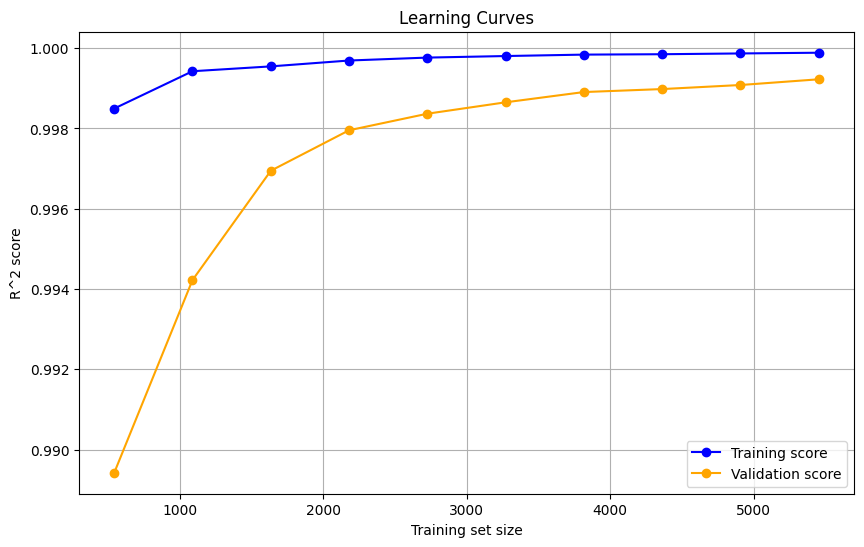

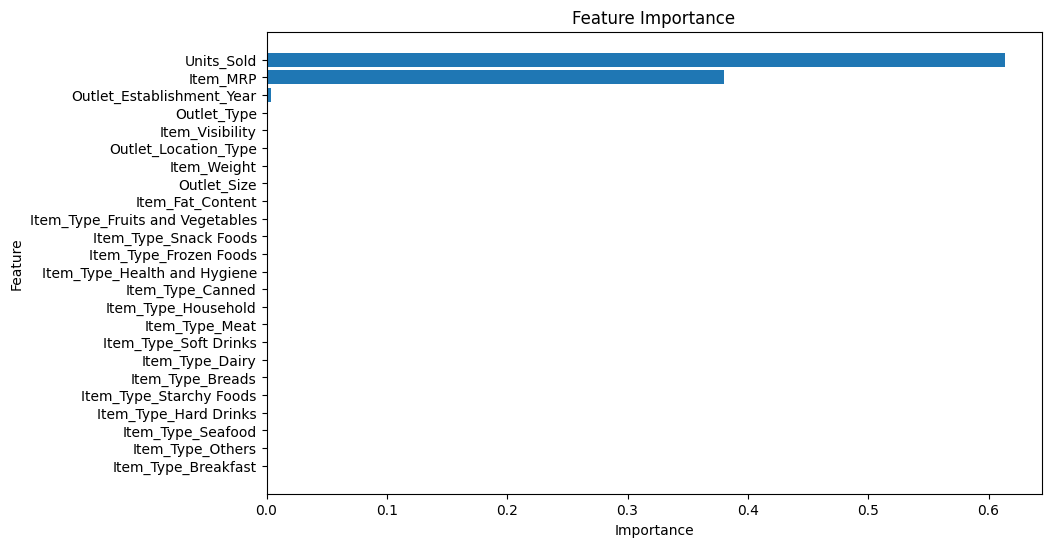

In [65]:
#Cross validation
model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean R^2 Score:", np.mean(cv_scores))

#Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='orange', label='Validation score')
plt.title('Learning Curves')
plt.xlabel('Training set size')
plt.ylabel('R^2 score')
plt.legend(loc='best')
plt.grid()
plt.show()

#Feature Importance
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [66]:
y_test_pred_tree = tree_regressor.predict(X_test_scaled)
y_test_pred_rf = best_rf.predict(X_test_scaled)
y_test_pred_xgb = best_xgb.predict(X_test_scaled)

test_data_predictions = pd.DataFrame({
    'Item_Identifier': test_identifiers['Item_Identifier'],
    'Outlet_Identifier': test_identifiers['Outlet_Identifier'],
    'Item_Outlet_Sales': y_test_pred_xgb
})

test_data_predictions.to_csv('Bigmart_Test_Predictions.csv', index = False)

from google.colab import drive
drive.mount('/content/drive')

test_data_predictions.to_csv('/content/drive/MyDrive/Bigmart_Test_Predictions.csv', index = False)

print('Test set predictions saved to Bigmart_Test_Predictions.csv')



Mounted at /content/drive
Test set predictions saved to Bigmart_Test_Predictions.csv


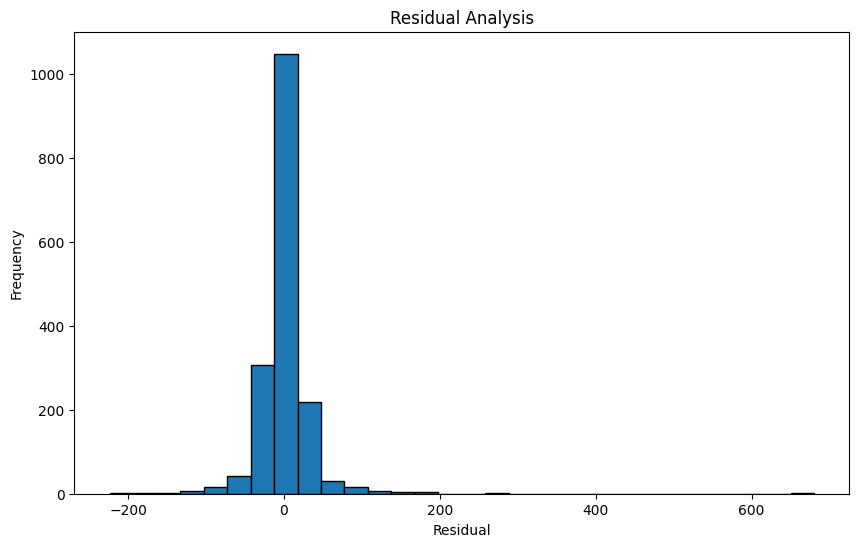

In [67]:
#Residual Analysis
y_val_pred = model.predict(X_val)
residuals = y_val - y_val_pred

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Analysis')
plt.show()


